In [4]:
# Install missing packages
# %pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/osaosberto/Downloads/olfc-data.csv')

In [6]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Length: 25480, dtype: bool

In [9]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<Figure size 1000x600 with 0 Axes>

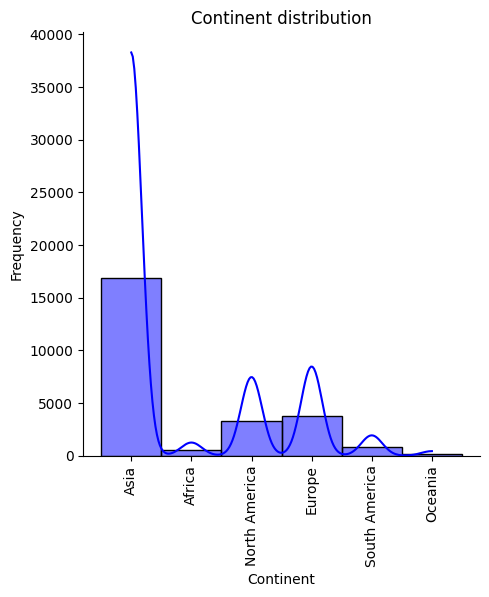

In [10]:
# comparing  contient approval rates
plt.figure(figsize=(10,6))
sns.displot(df['continent'], kde=True, color='blue', bins=30)
plt.title('Continent distribution')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [11]:
df_cont = df['continent'].value_counts() / len(df['continent']) * 100
df_cont

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: count, dtype: float64

<Figure size 1000x600 with 0 Axes>

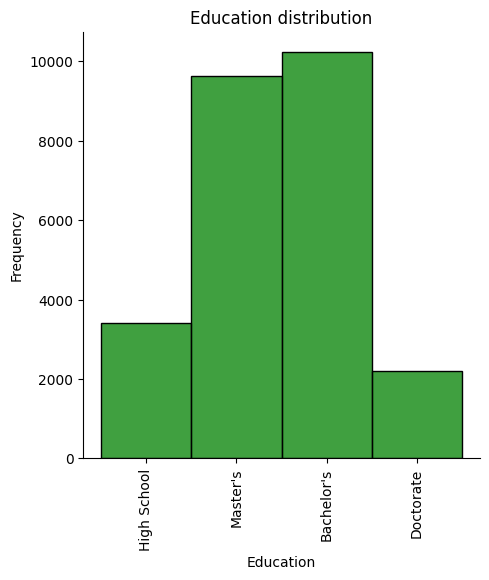

In [12]:
#comparing education level approval rates
plt.figure(figsize=(10,6))
sns.displot(df['education_of_employee'], color='g', )
plt.title('Education distribution')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

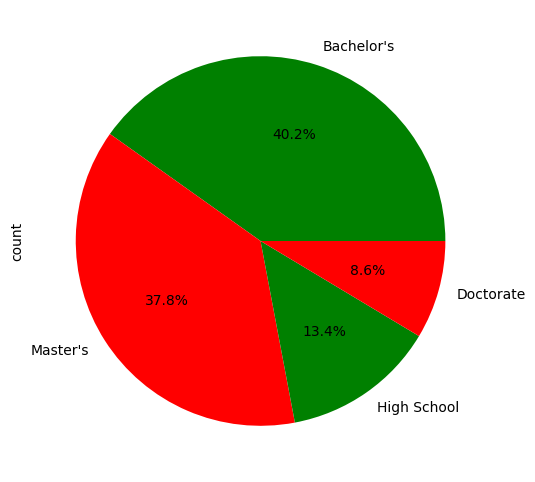

In [13]:
# compariing percentage of education level approval rate 

df_hose = df['education_of_employee'].value_counts() / len(df['education_of_employee']) * 100
df_hose.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], figsize=(10, 6))

Text(0.5, 1.0, 'Case status distribution')

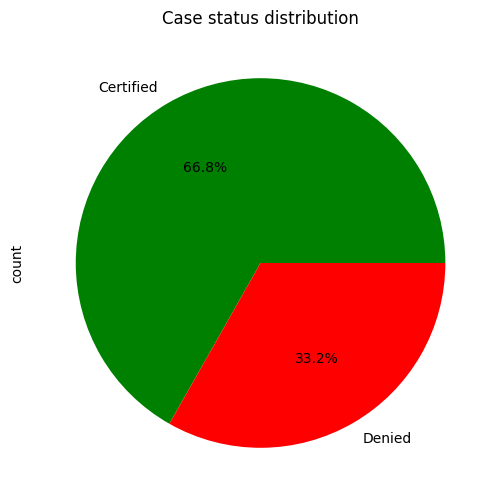

In [14]:
# comparing percentage of case_status approval rate
# case_status showed a signifcant high percentage of approved compared to denied in the year in view
df_case = df['case_status'].value_counts() / len(df['case_status']) * 100
df_case.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], figsize=(10, 6))
plt.title('Case status distribution')

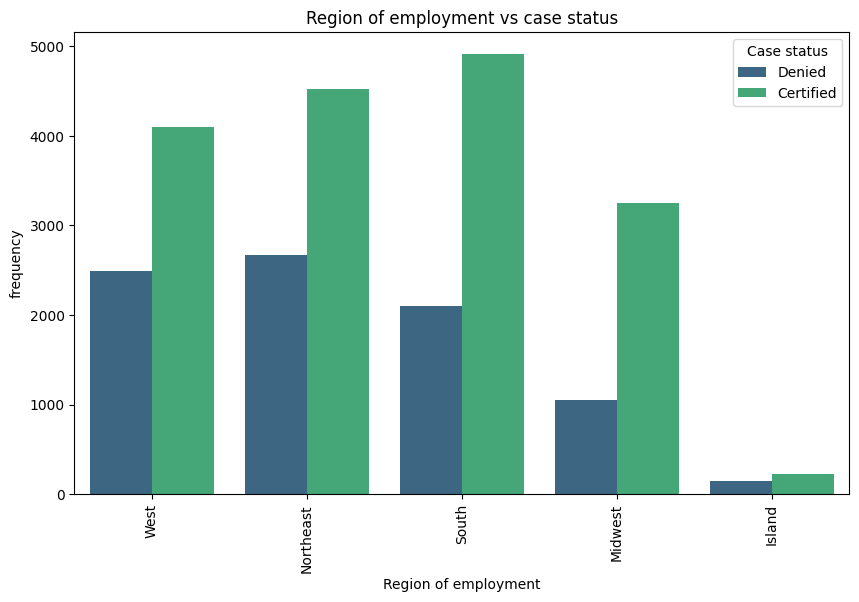

In [15]:
# comparing region by  approval rates
plt.figure(figsize=(10,6))      
sns.countplot(x='region_of_employment', data=df, palette='viridis', hue= 'case_status')
plt.title('Region of employment vs case status')
plt.xlabel('Region of employment')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.legend(title='Case status')
plt.show()
plt.show()


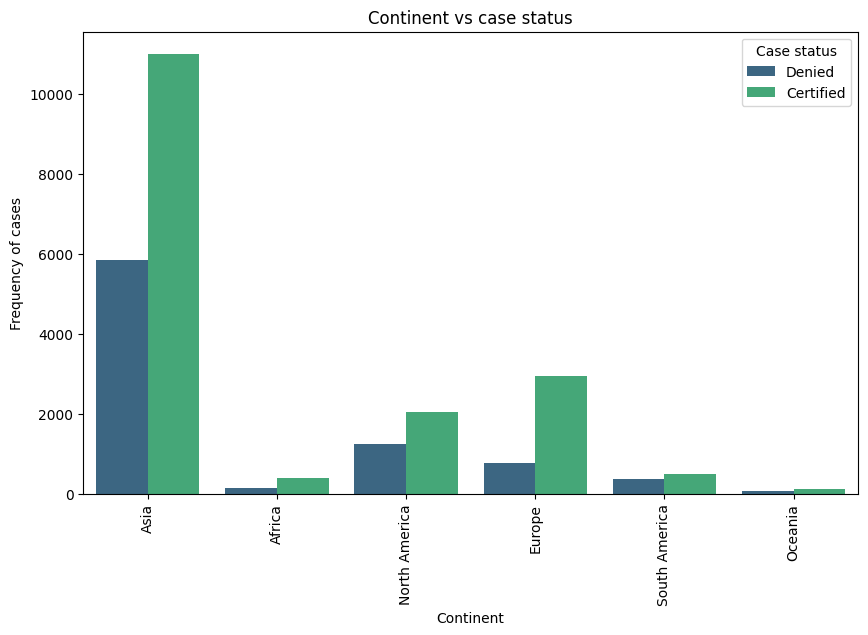

In [16]:
# comparing case_status by  continent
# Asia had the highest certified and denied cases
plt.figure(figsize=(10,6))
sns.countplot(x='continent', data=df, palette='viridis', hue= 'case_status')
plt.title('Continent vs case status')   
plt.xlabel('Continent')
plt.ylabel('Frequency of cases')
plt.xticks(rotation=90)
plt.legend(title='Case status')
plt.show()

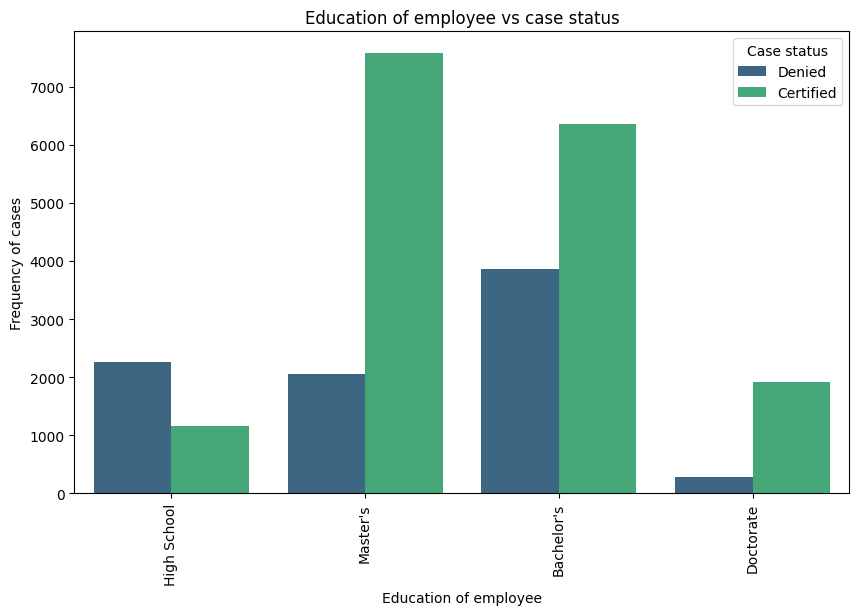

In [17]:
# comparing education_of_employee  by case_status
plt.figure(figsize=(10,6))
sns.countplot(x='education_of_employee', data=df, palette='viridis', hue= 'case_status')
plt.title('Education of employee vs case status')
plt.xlabel('Education of employee')
plt.ylabel('Frequency of cases')
plt.xticks(rotation=90)
plt.legend(title='Case status')
plt.show()

<Axes: ylabel='count'>

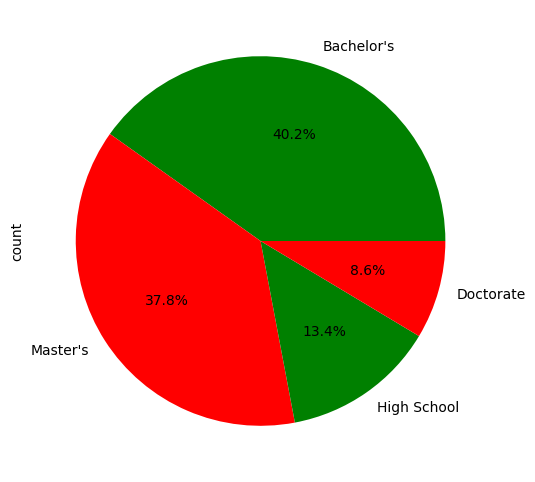

In [18]:
# comparing total number of education level 

df_hose = df['education_of_employee'].value_counts() / len(df['education_of_employee']) * 100
df_hose.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], figsize=(10, 6))

In [19]:
df1 = df[['case_status', 'education_of_employee']].value_counts() * 100 / len(df[['case_status', 'education_of_employee']])
df1 = df1.reset_index(name='percentage')  # Convert Series to DataFrame and reset index
df1 = df1.pivot(index='education_of_employee', columns='case_status', values='percentage')
df1 = df1.reset_index()


array([<Axes: ylabel='Certified'>, <Axes: ylabel='Denied'>], dtype=object)

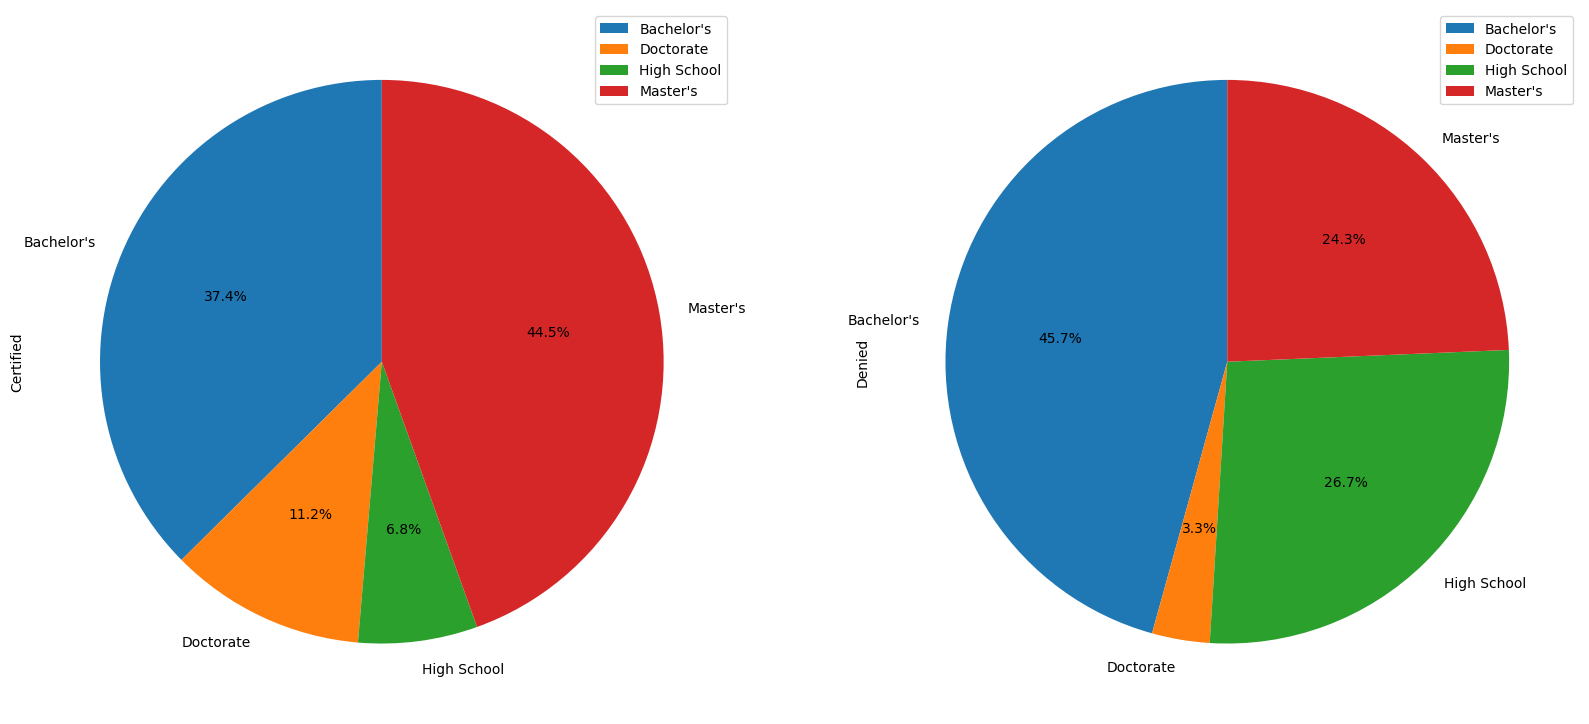

In [20]:
df1.set_index('education_of_employee')[['Certified', 'Denied']].plot.pie(subplots=True, figsize=(20, 10), autopct='%1.1f%%', startangle=90)

In [21]:
df.head(20)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


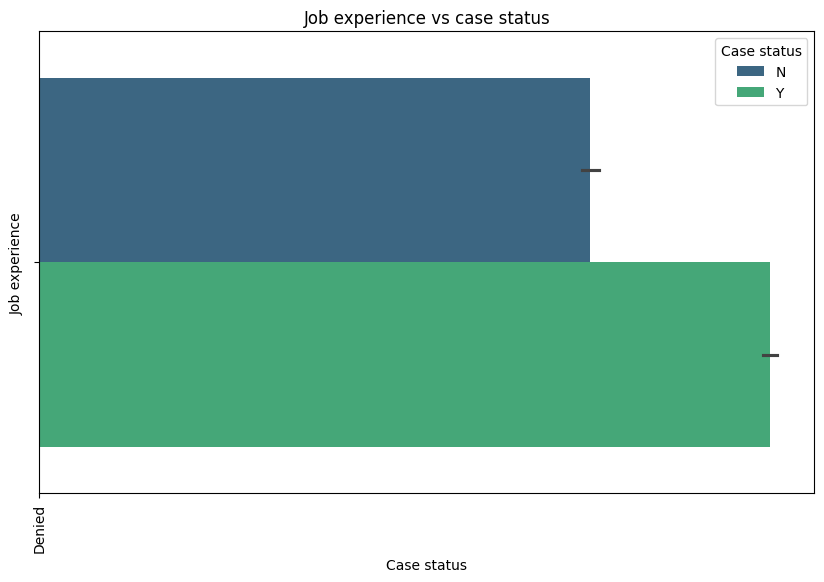

In [22]:
# comparing job experience by case_status
plt.figure(figsize=(10,6))
sns.barplot(x='case_status', hue='has_job_experience', data=df, palette='viridis')
plt.title('Job experience vs case status')
plt.xlabel('Case status')
plt.ylabel('Job experience')
plt.xticks(rotation=90)
plt.legend(title='Case status')
plt.show()


case_status,has_job_experience,Certified,Denied
0,N,23.524333,18.383046
1,Y,43.265306,14.827316


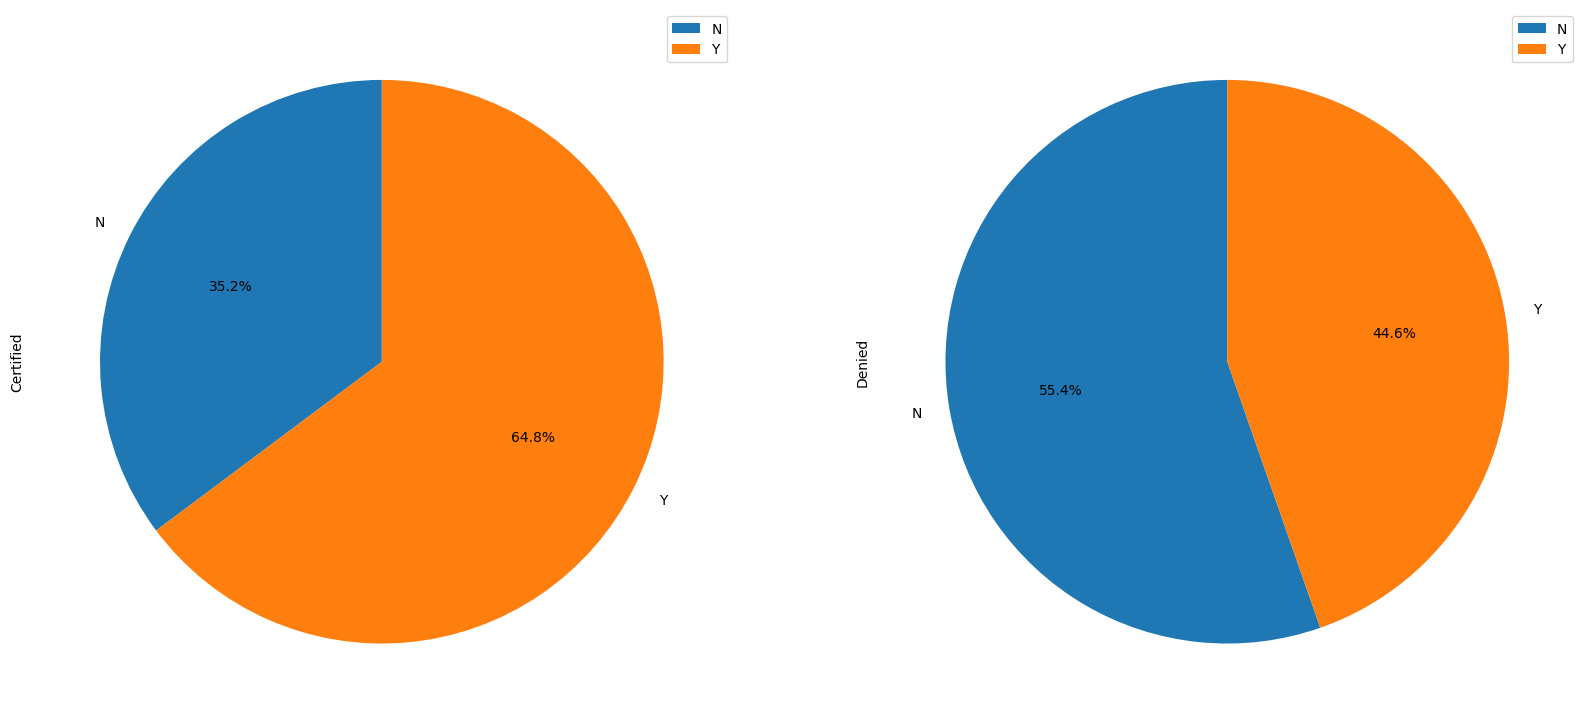

In [23]:

df2 = df[['case_status', 'has_job_experience']].value_counts() * 100 / len(df[['case_status', 'has_job_experience']])
df2 = df2.reset_index(name='percentage')  # Convert Series to DataFrame and reset index
df2 = df2.pivot(index='has_job_experience', columns='case_status', values='percentage')
df2 = df2.reset_index()
df2.set_index('has_job_experience')[['Certified', 'Denied']].plot.pie(subplots=True, figsize=(20, 10), autopct='%1.1f%%', startangle=90)
df2


In [24]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [25]:

# Install missing packages
# pip install scikit-learn catboost

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import ConfusionMatrixDisplay



In [26]:
df.drop(columns=['case_id'], inplace=True)




In [27]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [28]:
# Define the features and target variable
X = df.drop(columns=['case_status'])
y = df['case_status']

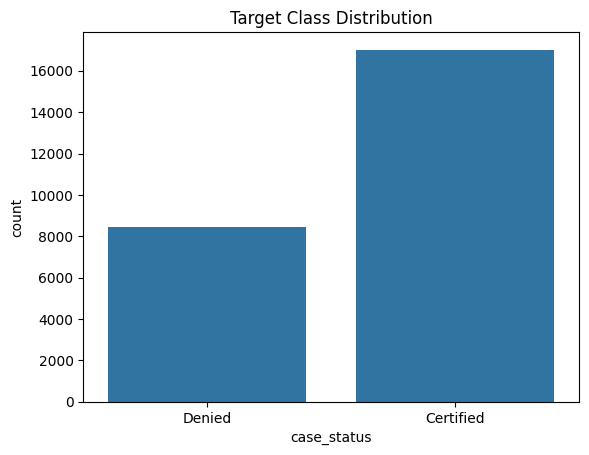

In [29]:
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

In [30]:
label = LabelEncoder()
y= label.fit_transform(y)

y



array([1, 0, 1, ..., 0, 0, 0])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20384, 10), (5096, 10), (20384,), (5096,))

In [32]:
# Define categorical and numerical features

Categorical_feature= X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [33]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), Categorical_feature),
    ],
    remainder='passthrough',

)









In [34]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),        
    ('smote', SMOTE(random_state=42)),     
    ('classifier', CatBoostClassifier(random_state=42, verbose=0, iterations=100, learning_rate=0.1, depth=6, l2_leaf_reg=3, eval_metric='F1', devices='0:1')),
])

In [35]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['no_of_employees',
                                                   'yr_of_estab',
                                                   'prevailing_wage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['continent',
                                                   'education_of_employee',
                                                   'has_job_experience',
                                                   'requires_job_training',
                                                   'region_of_employment',
                                                   'unit_of_wage',
                                                   'full_time_position'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x16014f4f0>)])

In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
report = classification_report(y_test, y_pred,labels=[0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3401
           1       0.61      0.65      0.63      1695
           2       0.00      0.00      0.00         0

    accuracy                           0.74      5096
   macro avg       0.48      0.48      0.48      5096
weighted avg       0.75      0.74      0.75      5096



/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [38]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),        
    ('smote', SMOTE(random_state=42)),     
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)),
])

In [39]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred,labels=[0,1,2])
print(report)


              precision    recall  f1-score   support

           0       0.82      0.71      0.76      3401
           1       0.54      0.70      0.61      1695
           2       0.00      0.00      0.00         0

    accuracy                           0.70      5096
   macro avg       0.46      0.47      0.46      5096
weighted avg       0.73      0.70      0.71      5096



/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [40]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),        
    ('smote', SMOTE(random_state=42)),     
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=2, min_samples_leaf=1)),
])

In [41]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred,labels=[0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3401
           1       0.56      0.67      0.61      1695
           2       0.00      0.00      0.00         0

    accuracy                           0.71      5096
   macro avg       0.46      0.47      0.46      5096
weighted avg       0.73      0.71      0.72      5096



/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [42]:
model= ImbPipeline(steps=[
    ('preprocessor', preprocessor),        
    ('smote', SMOTE(random_state=42)),     
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)),
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred,labels=[0,1,2])
print(report)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3401
           1       0.58      0.66      0.62      1695
           2       0.00      0.00      0.00         0

    accuracy                           0.73      5096
   macro avg       0.47      0.47      0.47      5096
weighted avg       0.74      0.73      0.73      5096



/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import LSTM, Dense, Masking, TimeDistributed
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


 

In [44]:
# Encode label 
label_encoder= LabelEncoder()
df['label'] = label_encoder.fit_transform(df['case_status'])
y = to_categorical(df['label'])



In [45]:

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
# Create a 'text' column by concatenating relevant columns
df['text'] = df[['continent', 'education_of_employee', 'has_job_experience', 
				 'requires_job_training', 'region_of_employment', 
				 'unit_of_wage', 'full_time_position', 'case_status']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=max_len)


In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
 # Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='sigmoid'))  # Use 'sigmoid' for multi-label classification

/Users/osaosberto/Library/Python/3.10/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
 # Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9146 - loss: 0.1991 - val_accuracy: 1.0000 - val_loss: 2.0081e-06
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 1.0000 - loss: 1.0326e-04 - val_accuracy: 1.0000 - val_loss: 2.0745e-07
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 1.0000 - loss: 6.2773e-05 - val_accuracy: 1.0000 - val_loss: 3.9122e-08
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 1.0000 - loss: 2.3347e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 1.0000 - loss: 2.1980e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 2081s 8s/step - accuracy: 1.0000 - loss: 3.9016e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 3935s 15s/step - accuracy: 1.0000 - loss: 6.6964e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━

In [50]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

160/160 ━━━━━━━━━━━━━━━━━━━━ 1032s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 1.00


In [63]:
y_pred = model.predict(X_test)
y_pred

160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


array([[0.5020225 , 0.5008974 ],
       [0.5008701 , 0.50162995],
       [0.5004642 , 0.5012699 ],
       ...,
       [0.5045218 , 0.49937427],
       [0.5009513 , 0.50143874],
       [0.5025746 , 0.50031614]], dtype=float32)

In [52]:
# Convert probabilities to predicted class indices
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [53]:
# Define class names
class_names = ['Certified', 'Denied']

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

   Certified       1.00      1.00      1.00      3401
      Denied       1.00      1.00      1.00      1695

    accuracy                           1.00      5096
   macro avg       1.00      1.00      1.00      5096
weighted avg       1.00      1.00      1.00      5096



<Figure size 1000x600 with 0 Axes>

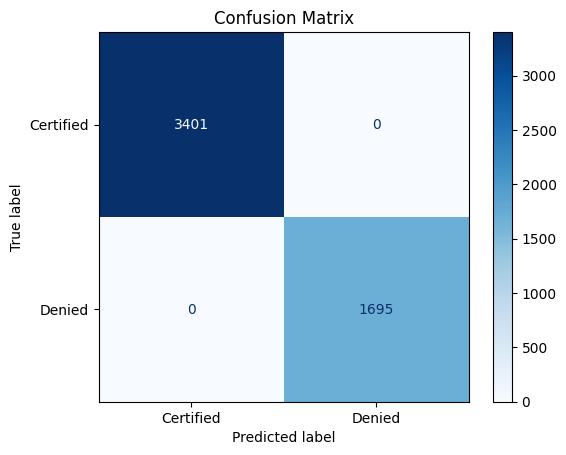

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(10, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [61]:


# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as model.pkl")

Model saved as model.pkl


In [56]:
import pickle

In [57]:
# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f) 

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)  

In [58]:
import mlflow
import mlflow.keras

In [59]:
import mlflow
import mlflow.keras

mlflow.set_experiment("oflc_LSTM")

with mlflow.start_run() as run:
    run_id = run.info.run_id
    print("Run ID:", run_id)

    # Define the model URI for serving
    model_uri = f"runs:/{run_id}/model"

    # Log model with MLflow
    if 'model' in globals():
        mlflow.keras.log_model(model, artifact_path="model")
    else:
        raise NameError("The variable 'model' is not defined. Please ensure the model is created and available.")

    # Log parameters (optional)
    mlflow.log_param("max_words", max_words)
    mlflow.log_param("max_len", max_len)

    # Log tokenizer and label encoder as artifacts
    mlflow.log_artifact("tokenizer.pkl")
    mlflow.log_artifact("label_encoder.pkl")

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("loss", loss)


    from sklearn.metrics import precision_score, recall_score

    # Calculate precision and recall
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)

    print("Model logged to MLflow!")

2025/04/28 15:58:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Run ID: d09258d82f3a41ed815f4269f57245fd


2025/04/28 16:08:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged to MLflow!
